# Los Angeles Police Department Collision Dataset

### Source https://data.lacity.org/A-Safe-City/Traffic-Collision-Data-from-2010-to-Present/d5tf-ez2w

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import datetime
from pandas.tools.plotting import table

In [2]:
#import data
file_path = "Result/Daily_weather_and_collision_2016.csv"
collision_2016 = pd.DataFrame(pd.read_csv(file_path))
collision_2016.head()

,Date,Temp High,Temp Low,Rain level (inches),Collision Count
0,1/1/2016,64.34,46.96,0.000,137
1,1/2/2016,64.67,46.02,0.000,97
2,1/3/2016,61.68,54.76,0.000,101
3,1/4/2016,67.59,55.12,0.001,122
4,1/5/2016,56.98,47.89,1.173,128


In [3]:
#invert date into "yyyy-mm-dd" type, and use dt.day_name() to get the day of the week
day_of_week=[]
full_date = []
for date in collision_2016["Date"]:
    date= datetime.datetime.strptime(date,'%m/%d/%Y')
    full_date.append(f"{date.year}-{date.month}-{date.day}")

collision_2016["Date in Full"]=full_date
collision_2016["Date in Full"] = pd.to_datetime(collision_2016["Date in Full"])
collision_2016["Day of Week"] = collision_2016["Date in Full"].dt.day_name()
collision_2016.head()

,Date,Temp High,Temp Low,Rain level (inches),Collision Count,Date in Full,Day of Week
0,1/1/2016,64.34,46.96,0.000,137,2016-01-01,Friday
1,1/2/2016,64.67,46.02,0.000,97,2016-01-02,Saturday
2,1/3/2016,61.68,54.76,0.000,101,2016-01-03,Sunday
3,1/4/2016,67.59,55.12,0.001,122,2016-01-04,Monday
4,1/5/2016,56.98,47.89,1.173,128,2016-01-05,Tuesday


In [4]:
#get a list of each work day and the average accident number for every weekdays 
mon_list=collision_2016[collision_2016["Day of Week"]=="Monday"]["Collision Count"]
tue_list=collision_2016[collision_2016["Day of Week"]=="Tuesday"]["Collision Count"]
wed_list=collision_2016[collision_2016["Day of Week"]=="Wednesday"]["Collision Count"]
thu_list=collision_2016[collision_2016["Day of Week"]=="Thursday"]["Collision Count"]
fri_list=collision_2016[collision_2016["Day of Week"]=="Friday"]["Collision Count"]
#sat_list=collision_2016[collision_2016["Day of Week"]=="Saturday"]["Collision Count"]
#sun_list=collision_2016[collision_2016["Day of Week"]=="Sunday"]["Collision Count"]
average_accident_weekday = [mon_list.mean(),tue_list.mean(),wed_list.mean(),thu_list.mean(),fri_list.mean()]


<IPython.core.display.Javascript object>


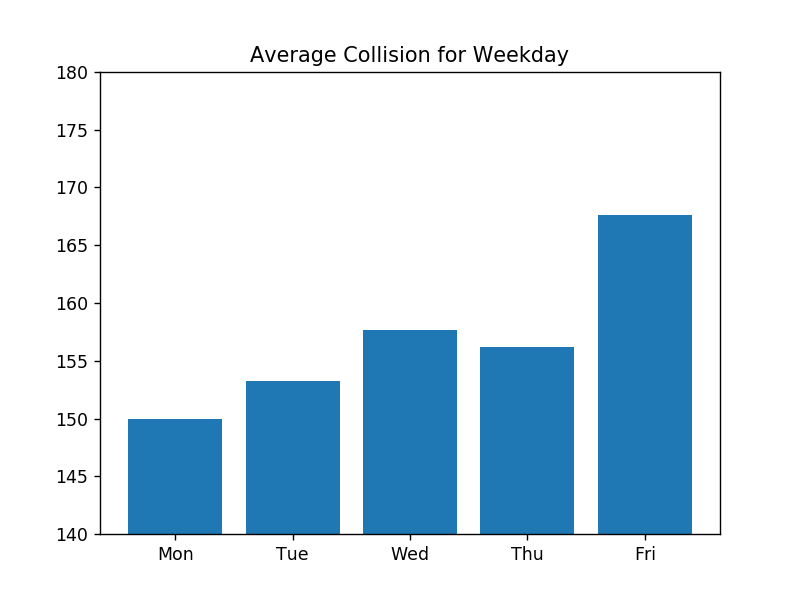

In [5]:
#bar plot to compare the average accident on each weekdays
weekday_label = ["Mon","Tue","Wed","Thu","Fri"]
plt.bar(weekday_label, average_accident_weekday)
plt.title("Average Collision for Weekday")
plt.ylim(140,180)
plt.savefig("Result/Average_Collision_for_Weekday.png")
plt.show()

<IPython.core.display.Javascript object>


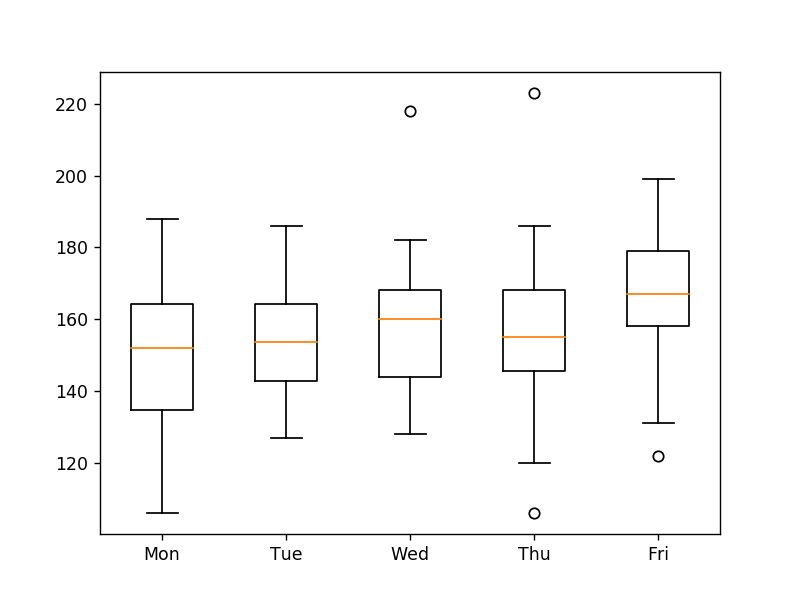

In [29]:
#boxplot
week_day_list=[mon_list,tue_list,wed_list,thu_list,fri_list]
plt.boxplot(week_day_list, labels=weekday_label)
plt.savefig("Result/Average_Collision_for_Weekday_boxplot.png")
plt.show()

In [32]:
#run cross T-test to see relationship between each weekday
week_day_list=[mon_list,tue_list,wed_list,thu_list,fri_list]
cross_ttest_list=[mon_list,tue_list,wed_list,thu_list,fri_list]

result_table=[]
for weekday in week_day_list:
    result_list=[]
    for testday in cross_ttest_list:
        statistic , pvalue = stats.ttest_ind(weekday, testday, equal_var=False)
        result_list.append(pvalue)
        #print(result_list)
    result_table.append(result_list)
    
result_df = pd.DataFrame({"Monday" :result_table[0],
                          "Tuesday" :result_table[1],
                          "Wednesday":result_table[2],
                          "Thursday":result_table[3],
                          "Friday" :result_table[4]} ).round(6)



result_df["Weekdays"]=["Monday","Tuesday","Wednesday","Thursday","Friday"]

result_df=result_df.set_index("Weekdays")
result_df
        
    

,Monday,Tuesday,Wednesday,Thursday,Friday
Weekdays,,,,,
Monday,1.000000,0.321668,0.030109,0.101943,0.000002
Tuesday,0.321668,1.000000,0.160574,0.395428,0.000013
Wednesday,0.030109,0.160574,1.000000,0.680460,0.003310
Thursday,0.101943,0.395428,0.680460,1.000000,0.001996
Friday,0.000002,0.000013,0.003310,0.001996,1.000000


In [33]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0.05 else 'black'
    return 'color: %s' % color

In [34]:
result_highlight = result_df.style.applymap(color_negative_red)
result_highlight

,Monday,Tuesday,Wednesday,Thursday,Friday
Weekdays,,,,,
Monday,1,0.321668,0.030109,0.101943,2e-06
Tuesday,0.321668,1,0.160574,0.395428,1.3e-05
Wednesday,0.030109,0.160574,1,0.68046,0.00331
Thursday,0.101943,0.395428,0.68046,1,0.001996
Friday,2e-06,1.3e-05,0.00331,0.001996,1
